<a href="https://colab.research.google.com/github/thewallandus/ml-with-pytorch/blob/main/01_pytorch_workflow_fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
what_were_covering = {
    1: "data",
    2: "build model or load one",
    3: "fitting the model to data",
    4: "making predictions and evaluating a model",
    5: "saving and loading a model",
    6: "putting it all together"
}

what_were_covering

{1: 'data',
 2: 'build model or load one',
 3: 'fitting the model to data',
 4: 'making predictions and evaluating a model',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn ## nn contains all of Pytorch's building blocks for nueral networks
import matplotlib.pyplot as plt


#CHECK Pytorch version
torch.__version__

'2.2.1+cu121'

## 1. Data (preparing and loading)

Data can be anything in almost anything:

* excel sheet.
* images.
* videos.
* audio.
* audio.
* dna.
* text.

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patters in that numerical representation.

Lets create some known data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known *parameters*.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and test sets

Lets create a training and test set with our data.

In [4]:
# Create a train/test split
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

how might we better visualise our data?

this is where the data explorer's motto comes in!

visualise, visualise, visualise!

In [5]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    Plots training data and test data and compares predictions
  """

  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    #Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

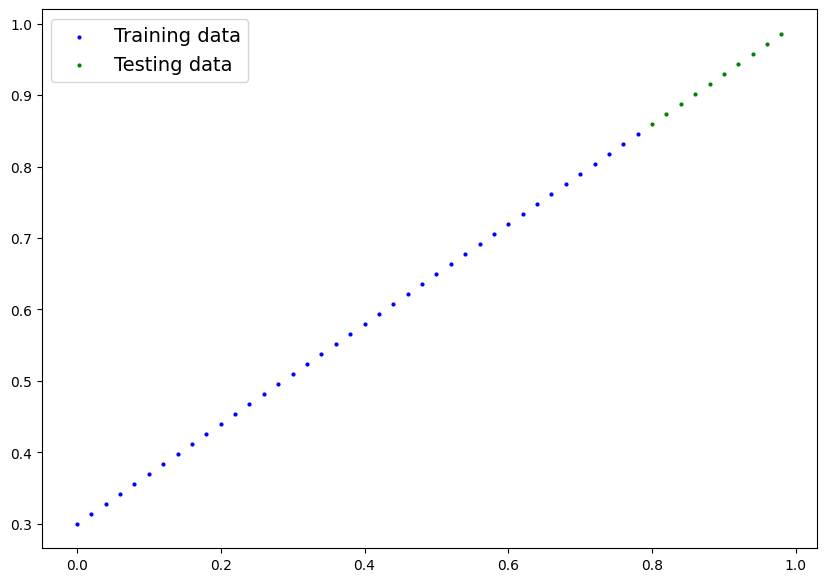

In [6]:
plot_predictions()

## 2. Building model

Our first Pytorch model.

What our model does:

* start with random valaues (weight and biases).
* look at the training data to better represent the weight and biases and get closer to them, to the ideal values.

How does it do so?

Through two main algorithms:

1. Gradient descent.
2. Backpropagation.

In [7]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <– almost everything in Pytorch inherits from nn.module
  def __init__(self):
    super().__init__()

    # Initialise model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Foward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### Pytorch model building essentials

* torch.nn - contains all of the building blocks for nueral networks
* torch.nn.Parameter - what parameters should out model try and learn, often a Pytorch layer from torch.nn will set this for us
* torch.nn.Module - base class for all nueral network modules, if you subclass it, you should overwrite forward()
* torch.optim - where optimizers in Pytorch live, should help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), defines what happens in the forward computation

### Checking the contents of our Pytorch model

Now we've created a model, lets see what's inside...

So we can check out model parameters using .parameters().

In [77]:
# Create a random seed.
torch.manual_seed(42)

# Create an instance of the model we created
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [65]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using torch.inference_mode()

To check our model's predictive power, lets see how well it predicts 'y_test' based on 'X_test'.

When we pass data through our model, it'll pass it through the forward() method.

In [78]:
# Make predictions with model:
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do similar stuff with torch.no_grad(), but inference mode is preferred and new
# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [67]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

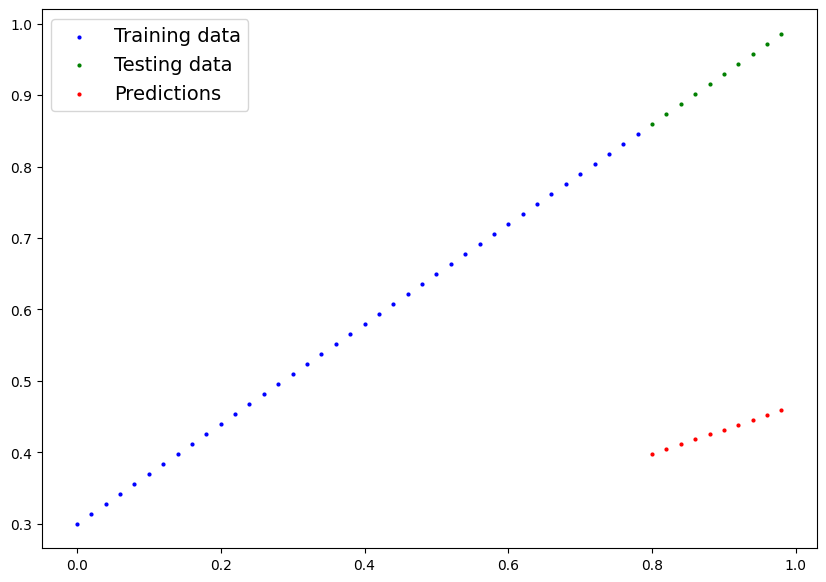

In [12]:
plot_predictions(predictions=y_preds)

### 3. Train the model

The whole idea of training is for a model to move from some unknown parameters to some known parameters.


Or in other words from a poor representation of data to a better representation of data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: loss function may also be called cost function or criterion is different areas.

Things we need to train:

**Loss function:** a function to meausre how wrong your model's predictions are.

**Optimizer** takes into account the loss of a model and adjusts the model's parameters (weights and biases) to improve the loss function.

And specifically for Pytorch, we need:
* A training loop
* A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [80]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)
# lr = learning rate = possibly the most important hyperparameter
# here params are just the weights and biases, remember

In [16]:
loss_fn

L1Loss()

### Building a traning loop (and a testing loop) in Pytroch:

* A couple of things we need in a training loop:

– Loop through the data.

– Forward pass (this involves data moving through out model's forward function) to make predictions on data, also called forward propagation.

– Calculate the loss (compare forward pass predictions to ground truth labels).

– Optimizer zero grad

– Loss background – move backwarrds through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**backpropagation**)

– Optimizer step – use the optimzer to adjust our model's parameters to try and improve the loss (**gradient descent**)


In [82]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad (they accumulate by default)
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the mdoel
  loss.backward()

  #5. Step the optimizer
  optimizer.step() # by default how the optimizer changes with accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

  ### Testing code
  model_0.eval()
  ### turns off different settings in the model not needed for evaluation / testing

  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    # Print our model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.3013603389263153 | Test loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10 | Loss: 0.18615034222602844 | Test loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20 | Loss: 0.08227583020925522 | Test loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30 | Loss: 0.05181945487856865 | Test loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40 | Loss: 0.04503796249628067 | Test loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04132963344454765 | Test loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60 | Loss: 0.03785243630409241 | Test loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))

In [87]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()), test_loss_values

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
        0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
        0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
       dtype=float32),
 [tensor(0.4676),
  tensor(0.3329),
  tensor(0.2070),
  tensor(0.1402),
  tensor(0.1118),
  tensor(0.0981),
  tensor(0.0878),
  tensor(0.0795),
  tensor(0.0719),
  tensor(0.0636),
  tensor(0.0554),
  tensor(0.0478),
  tensor(0.0395),
  tensor(0.0312),
  tensor(0.0236),
  tensor(0.0154),
  tensor(0.0071),
  tensor(0.0084),
  tensor(0.0084),
  tensor(0.0084)])

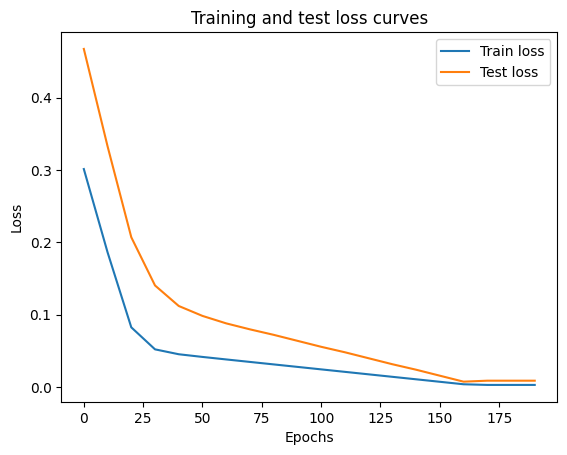

In [89]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [84]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [29]:
weight, bias

(0.7, 0.3)

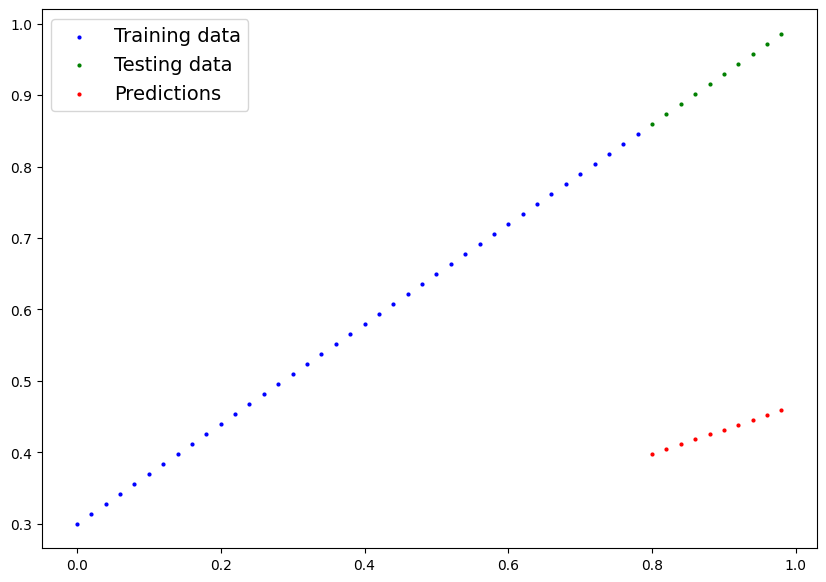

In [54]:
plot_predictions(predictions=y_preds)

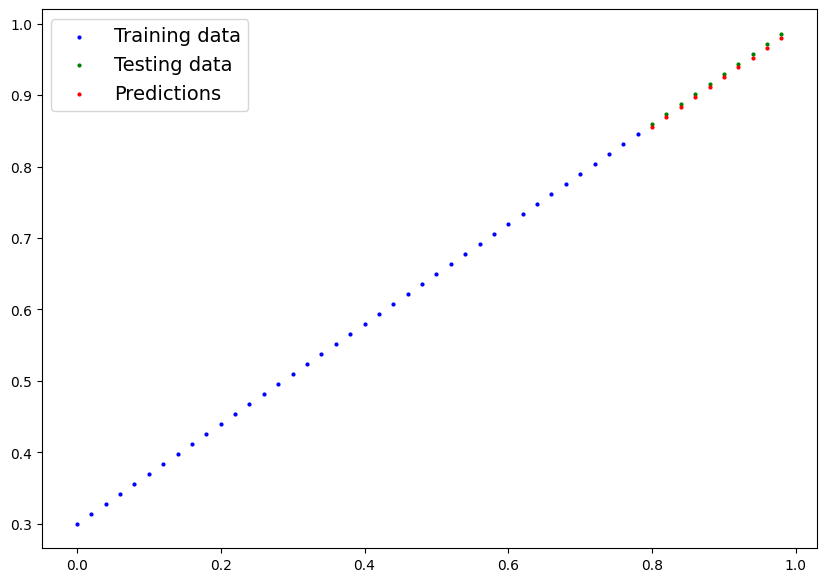

In [85]:
plot_predictions(predictions=y_preds_new)

## Saving a model in Pytorch

There are 3 main methods to know about to save and load models in Pytorch.

1. torch.save() - allows us to save a Pytorch object in Python's pickle format.

2. torch.load() = allows you to load a saved Pytorch object.

3. torch.nn.Module.load_state_dict() - this allows us to a load a model's saved state dictionary.

In [90]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [92]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: Models/01_pytorch_workflow_model_0.pth


### Loading a Pytorch model using the saved state_dict

In [97]:
# Create a new instance
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [100]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [101]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [103]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])